In [5]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [63]:
num_agents = 200
num_iterations = 16
num_params = 6
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [64]:
default = utils.read_csv("temp/default.csv")[0]
default_params = default[:num_params]
default_metrics =default[num_params:]

In [65]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


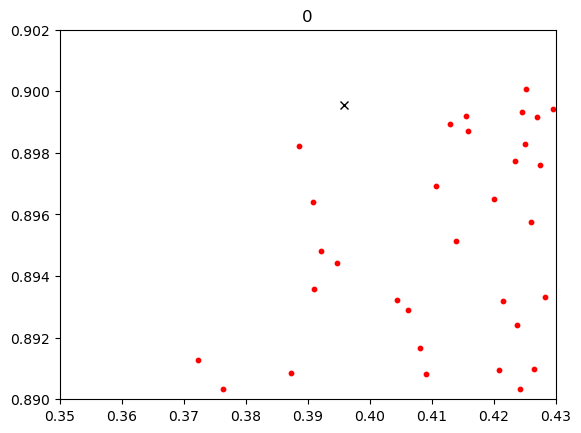

In [66]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.35, 0.43)
    ax.set_ylim(0.89, 0.902)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [23]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [24]:
len(pareto_front)

147

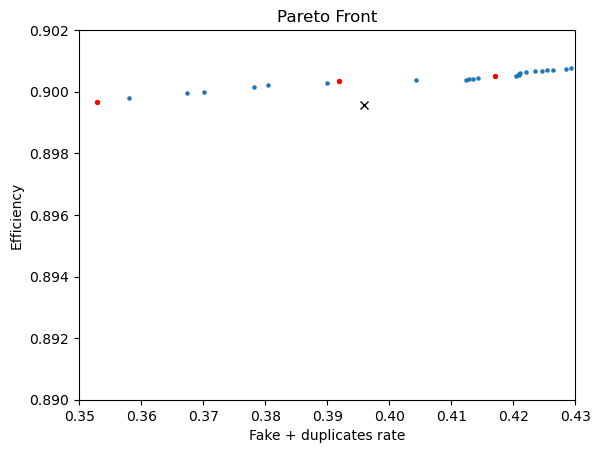

In [45]:
point1 = pareto_front[120]
point2 = pareto_front[127]
point3 = pareto_front[133]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[num_params + 1], point2[num_params + 1], point3[num_params + 1]], 
            [1 - point1[num_params], 1 - point2[num_params], 1 - point3[num_params]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.35, 0.43)
plt.ylim(0.89, 0.902)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.show()

In [46]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.002028050282041101, 0.002983077366310212, 0.14861800910723383, 0.7167769105392281, 0.015269489109405135, 18.533096461073736]
[0.002021592499985967, 0.006356526931112466, 0.17123881728190646, 0.7647655693118857, 0.016820360082001343, 18.697464801321782]
[0.001983831727196099, 0.006290464736656041, 0.17924296058332317, 0.778624818655367, 0.01958692199890321, 18.698422627890764]


In [47]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [48]:
utils.write_csv('MTV/selected_params.csv', selected_params)

In [37]:
print(point1)
print(point2)
print(point3)

[2.05907415e-03 6.48212204e-03 1.70507945e-01 7.43926520e-01
 1.46768101e-02 1.86780776e+01 1.00019875e-01 3.70154809e-01]
[2.02159250e-03 6.35652693e-03 1.71238817e-01 7.64765569e-01
 1.68203601e-02 1.86974648e+01 9.96555037e-02 3.91869324e-01]
[1.98383173e-03 6.29046474e-03 1.79242961e-01 7.78624819e-01
 1.95869220e-02 1.86984226e+01 9.94898804e-02 4.17028699e-01]


In [44]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))

